# My first image recognition algorithm!

 Build the general architecture of a learning algorithm, including:  
– Initializing parameters  
– Calculating the cost function and its gradient  
– Using an optimization algorithm (gradient descent)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
# import bqplot.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
#     print(np.shape(train_set_y_orig))
    # list -> np.array
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
#     print(np.shape(train_set_y_orig))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

np.shape(train_set_x_orig)
np.shape(train_set_y)

np.shape(classes)

(209, 64, 64, 3)

(1, 209)

(2,)

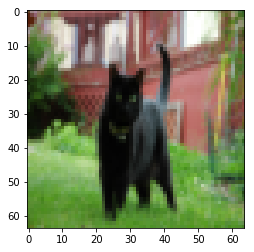

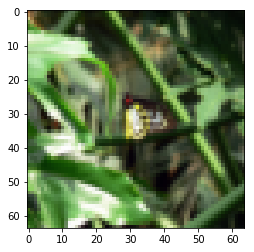

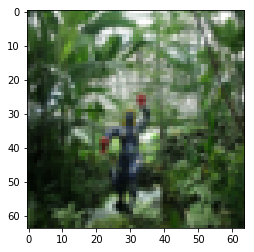

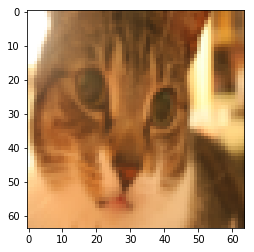

In [27]:
# 查看图像
for _ in range(197,201):
    plt.imshow(train_set_x_orig[_])
    plt.show()

Now we have 209 RGB photos and Each photo has 64 by 64 pixels

In [4]:
# let's take a look at the data
train_set_y
index = 90
# train_set_x_orig[index]
plt.imshow(train_set_x_orig[index])

print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

y = [0], it's a 'non-cat' picture.


In [5]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]


print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


 Reshape the training and test data sets 使大小为 (num_px, num_px, 3) 的图像 flatten into 为单个向量of shape (num_px ∗ num_px ∗ 3, 1).   
 A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use: 
```python
X_flatten = X.reshape(-1,X.shape[0]) or  
X_flatten = X.reshape(X.shape[0],-1).T
```

`np.reshape(x,(n,-1))` Or  `x.reshape(n,-1)`  
表示将数组x reshape成n行 （）列的数组， '-1'表示未指定值，会根据原数组个数自动分配值。


In [6]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


机器学习中一个常见的预处理步骤是对数据集进行集中（center）和标准化(standardize)，这意味着从每个示例中减去整个numpy数组的平均值，然后将每个示例除以整个numpy数组的标准差(standard deviation)。但是对于图片数据集来说，将数据集的每一行除以255(像素通道的最大值)会更简单、更方便，而且几乎同样有效。

In [43]:
def normalize_feature(X_flatten):
    """ 
    center and standardize 
    i.e.
    X - X.mean then divide standard deviation
    """

    return (X_flatten - X_flatten.mean())/X_flatten.std()

# train_set_x = train_set_x_flatten/255
# test_set_x = test_set_x_flatten/255

train_set_x = normalize_feature(train_set_x_flatten)
test_set_x = normalize_feature(test_set_x_flatten)

Mathematical expression of the algorithm:  
> $$
\begin{aligned} z^{(i)} &=w^{T} x^{(i)}+b \\ \hat{y}^{(i)} &=a^{(i)}=\operatorname{sigmoid}\left(z^{(i)}\right) \\ \mathcal{L}\left(a^{(i)}, y^{(i)}\right) &=-y^{(i)} \log \left(a^{(i)}\right)-\left(1-y^{(i)}\right) \log \left(1-a^{(i)}\right) \end{aligned}
$$  
The cost is then computed by summing over all training examples:  
>$$ 
J=\frac{1}{m} \sum_{i=1}^{m} \mathcal{L}\left(a^{(i)}, y^{(i)}\right)
 $$

In [8]:
# GRADED FUNCTION: sigmoid
def sigmoid(z):
    """
    Compute the sigmoid of z
    Arguments: z -- A scalar or numpy array of any size.
    Return: s -- sigmoid(z) 
    """
    s = 1/(1+np.exp(-z))
    return s

Initializing parameters

In [25]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.zeros((dim,1))
    b = 0
    
    return w, b

这里bias `b` 完全可以纳入为 w0  
但这在后面的处理上面显得并不是很方便， 也不是很有效率， 不过形式上会好看一些。


**Forward and Backward propagation**  
Forward Propagation:  
* get X
* compute $A=\sigma\left(w^{T} X+b\right)=\left(a^{(0)}, a^{(1)}, \ldots, a^{(m-1)}, a^{(m)}\right)$
* calculate the cost function:$J=-\frac{1}{m} \sum_{i=1}^{m} y^{(i)} \log \left(a^{(i)}\right)+\left(1-y^{(i)}\right) \log \left(1-a^{(i)}\right)$

Backward propagation:
$$ 
\begin{aligned} \frac{\partial J}{\partial w} &=\frac{1}{m} X(A-Y)^{T} \\ \frac{\partial J}{\partial b} &=\frac{1}{m} \sum_{i=1}^{m}\left(a^{(i)}-y^{(i)}\right) \end{aligned}
 $$
 also, 'b'can be absorbed into 'w'

In [16]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    

    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b)                                     # compute activation

    cost = -1 / m * np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))            # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)

    dw = 1 / m * np.dot(X,(A-Y).T) 
    db = 1 / m * np.sum(A-Y)
  
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

The goal is to learn $w$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [17]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    """
    costs = []
    
    for i in range(num_iterations):
        # 计算梯度
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        
        # 反向传播
        w = w - dw *learning_rate
        b = b - db *learning_rate
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [19]:
w, b, X, Y = np.array([[1.],[2.]]), 2.,np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 5.801545
w = [[ 0.19033591]
 [ 0.12259159]]
b = 1.92535983008
dw = [[ 0.67752042]
 [ 1.41625495]]
db = 0.219194504541


The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There is two steps to computing predictions:  
1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [20]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture

    A = sigmoid(np.dot(w.T,X)+b) 

    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]

        if A[0,i]>0.5:
            Y_prediction[0,i] =1
        else:
            Y_prediction[0,i] =0
    
    
    return Y_prediction

## Merge all functions into a model

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

Implement the model function. Use the following notation:
    - Y_prediction for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [36]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model 
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    Y_prediction_test =  predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.088551
Cost after iteration 200: 0.050357
Cost after iteration 300: 0.034929
Cost after iteration 400: 0.026631
Cost after iteration 500: 0.021474
Cost after iteration 600: 0.017970
Cost after iteration 700: 0.015438
Cost after iteration 800: 0.013526
Cost after iteration 900: 0.012031
Cost after iteration 1000: 0.010831
Cost after iteration 1100: 0.009848
Cost after iteration 1200: 0.009027
Cost after iteration 1300: 0.008331
Cost after iteration 1400: 0.007734
train accuracy: 100.0 %
test accuracy: 70.0 %


Text(0, 0.5, 'cost')

Text(0.5, 0, 'iterations (per hundreds)')

Text(0.5, 1.0, 'Learning rate =0.01')

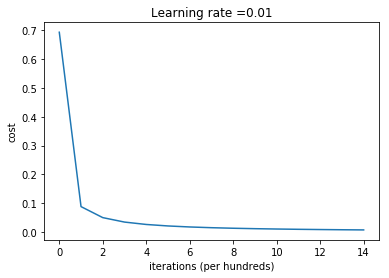

In [51]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, 
          num_iterations = 1500, learning_rate = 0.01, print_cost = True)

costs = np.squeeze(d['costs']) 
plt.plot(costs) 
plt.ylabel('cost') 
plt.xlabel('iterations (per hundreds)') 
plt.title("Learning rate =" + str(d["learning_rate"])) 
plt.show()

In [45]:
d['w']

array([[ 0.00587942],
       [-0.01635354],
       [-0.00736501],
       ..., 
       [-0.0085537 ],
       [-0.01610726],
       [ 0.01648304]])